# Working with text
http://matplotlib.org/users/index_text.html

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Text introduction
http://matplotlib.org/users/text_intro.html

matplotlib has extensive text support, including support for mathematical expressions, truetype support for raster and vector outputs, newline separated text with arbitrary rotations, and unicode support. Because it embeds fonts directly in output documents, e.g., for postscript or PDF, what you see on the screen is what you get in the hardcopy. FreeType support produces very nice, antialiased fonts, that look good even at small raster sizes. matplotlib includes its own matplotlib.font_manager (thanks to Paul Barrett), which implements a cross platform, W3C compliant font finding algorithm.

The user has a great deal of control over text properties (font size, font weight, text location and color, etc.) with sensible defaults set in the rc file. And significantly, for those interested in mathematical or scientific figures, matplotlib implements a large number of TeX math symbols and commands, supporting mathematical expressions anywhere in your figure.

### Basic text commands
The following commands are used to create text in the pyplot interface
```
text() - add text at an arbitrary location to the Axes; matplotlib.axes.Axes.text() in the API.
xlabel() - add a label to the x-axis; matplotlib.axes.Axes.set_xlabel() in the API.
ylabel() - add a label to the y-axis; matplotlib.axes.Axes.set_ylabel() in the API.
title() - add a title to the Axes; matplotlib.axes.Axes.set_title() in the API.
figtext() - add text at an arbitrary location to the Figure; matplotlib.figure.Figure.text() in the API.
suptitle() - add a title to the Figure; matplotlib.figure.Figure.suptitle() in the API.
annotate() - add an annotation, with
optional arrow, to the Axes ; matplotlib.axes.Axes.annotate() in the API.
```

All of these functions create and return a matplotlib.text.Text() instance, which can be configured with a variety of font and other properties. The example below shows all of these commands in action.

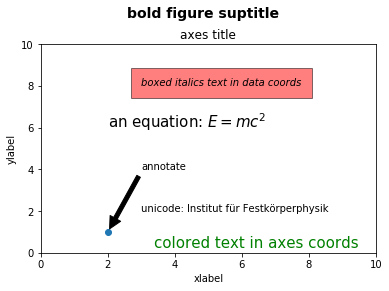

In [7]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

## Text properties and layout
http://matplotlib.org/users/text_props.html

The matplotlib.text.Text instances have a variety of properties which can be configured via keyword arguments to the text commands (e.g., ***title(), xlabel() and text()***).
```
Property	Value Type
alpha	float
backgroundcolor	any matplotlib color
bbox	Rectangle prop dict plus key 'pad' which is a pad in points
clip_box	a matplotlib.transform.Bbox instance
clip_on	[True | False]
clip_path	a Path instance and a Transform instance, a Patch
color	any matplotlib color
family	[ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
fontproperties	a FontProperties instance
horizontalalignment or ha	[ 'center' | 'right' | 'left' ]
label	any string
linespacing	float
multialignment	['left' | 'right' | 'center' ]
name or fontname	string e.g., ['Sans' | 'Courier' | 'Helvetica' ...]
picker	[None|float|boolean|callable]
position	(x, y)
rotation	[ angle in degrees | 'vertical' | 'horizontal' ]
size or fontsize	[ size in points | relative size, e.g., 'smaller', 'x-large' ]
style or fontstyle	[ 'normal' | 'italic' | 'oblique' ]
text	string or anything printable with ‘%s’ conversion
transform	a Transform instance
variant	[ 'normal' | 'small-caps' ]
verticalalignment or va	[ 'center' | 'top' | 'bottom' | 'baseline' ]
visible	[True | False]
weight or fontweight	[ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
x	float
y	float
zorder	any number
```

You can lay out text with the alignment arguments ***horizontalalignment, verticalalignment***, and ***multialignment***. ***horizontalalignment*** controls whether the x positional argument for the text indicates the left, center or right side of the text bounding box. ***verticalalignment*** controls whether the y positional argument for the text indicates the bottom, center or top side of the text bounding box. multialignment, for newline separated strings only, controls whether the different lines are left, center or right justified. Here is an example which uses the text() command to show the various alignment possibilities. The use of ***transform=ax.transAxes*** throughout the code indicates that the coordinates are given relative to the axes bounding box, with 0,0 being the lower left of the axes and 1,1 the upper right.


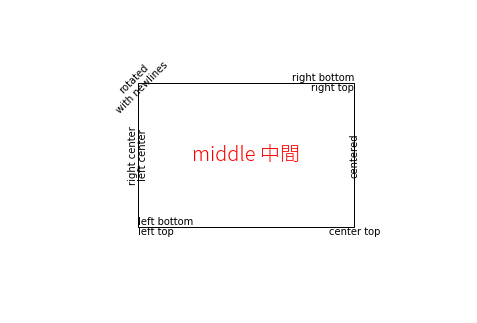

In [8]:
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJKtc-Light.otf')
#         fontProperties = prop,
# matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

t = ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle 中間',
        horizontalalignment='center',
        verticalalignment='center', 
        fontProperties = prop,
        fontsize=20, color='red',
        transform=ax.transAxes)


ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

## Default Font
http://matplotlib.org/users/text_props.html#default-font

The base default font is controlled by a set of rcParams:
```
rcParam	usage
'font.family'	List of either names of font or {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}.
'font.style'	The default style, ex 'normal', 'italic'.
'font.variant'	Default variant, ex 'normal', 'small-caps' (untested)
'font.stretch'	Default stretch, ex 'normal', 'condensed' (incomplete)
'font.weight'	Default weight. Either string or integer
'font.size'	Default font size in points. Relative font sizes ('large', 'x-small') are computed against this size.
```
The mapping between the family aliases ({'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}) and actual font names is controlled by the following rcParams:
```
family alias	rcParam with mappings
'serif'	'font.serif'
'monospace'	'font.monospace'
'fantasy'	'font.fantasy'
'cursive'	'font.cursive'
{'sans', 'sans serif', 'sans-serif'}	'font.sans-serif'
```
which are lists of font names.

### Text with non-latin glyphs

As of v2.0 the default font contains glyphs for many western alphabets, but still does not cover all of the glyphs that may be required by mpl users. For example, DejaVu has no coverage of ***Chinese***, Korean, or Japanese.

To set the default font to be one that supports the code points you need, prepend the font name to 'font.family' or the desired alias lists
> matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   # This doesn't work.

or set it in your .matplotlibrc file:
> font.sans-serif: Source Han Sans TW, Ariel, sans-serif   # This doesn't work.

To control the font used on per-artist basis use the 'name', 'fontname' or 'fontproperties' kwargs documented above.

On linux, ***fc-list*** can be a useful tool to discover the font name; for example
```
$ fc-list :lang=zh family
Noto to Sans Mono CJK TC,Noto Sans Mono CJK TC Bold
Noto Sans CJK TC,Noto Sans CJK TC Medium
Noto Sans CJK TC,Noto Sans CJK TC DemiLight
Noto Sans CJK KR,Noto Sans CJK KR Black
Noto Sans CJK TC,Noto Sans CJK TC Black
Noto Sans Mono CJK TC,Noto Sans Mono CJK TC Regular
Noto Sans CJK SC,Noto Sans CJK SC Light
```

lists all of the fonts that support Chinese.

## Annotation
http://matplotlib.org/users/annotations.html

### Basic annotation

The uses of the basic text() will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument ***xy*** and the location of the text ***xytext***. Both of these arguments are (x,y) tuples.

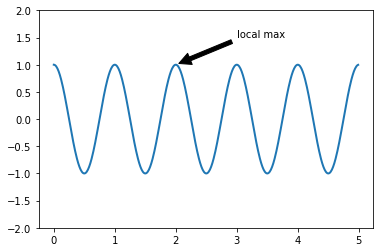

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

In this example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose – you can specify the coordinate system of xy and xytext with one of the following strings for xycoords and textcoords (default is ‘data’)
```
argument	coordinate system
‘figure points’	points from the lower left corner of the figure
‘figure pixels’	pixels from the lower left corner of the figure
‘figure fraction’	0,0 is lower left of figure and 1,1 is upper right
‘axes points’	points from lower left corner of axes
‘axes pixels’	pixels from lower left corner of axes
‘axes fraction’	0,0 is lower left of axes and 1,1 is upper right
‘data’	use the axes data coordinate system

```

For example to place the text coordinates in fractional axes coordinates, one could do:
> ax.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
            
For physical coordinate systems (points or pixels) the origin is the bottom-left of the figure or axes.

Optionally, you can enable drawing of an arrow from the text to the annotated point by giving a dictionary of arrow properties in the optional keyword argument arrowprops.
```
arrowprops key	description
width	the width of the arrow in points
frac	the fraction of the arrow length occupied by the head
headwidth	the width of the base of the arrow head in points
shrink	move the tip and base some percent away from the annotated point and text
**kwargs	any key for matplotlib.patches.Polygon, e.g., facecolor
```
In the example below, the xy point is in native coordinates (xycoords defaults to ‘data’). For a polar axes, this is in (theta, radius) space. The text in this example is placed in the fractional figure coordinate system. ***matplotlib.text.Text*** keyword args like horizontalalignment, verticalalignment and fontsize are passed from annotate to the Text instance.            

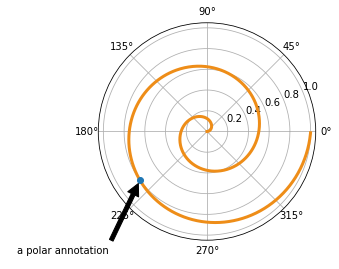

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')

ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )

plt.show()

## Advanced Annotation
### Annotating with Text with Box

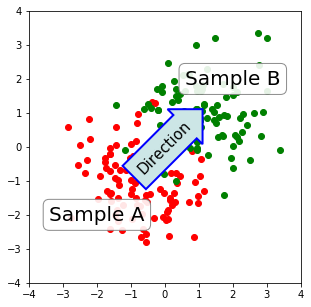

In [12]:
fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)

ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()
plt.show()

The text() function in the pyplot module (or text method of the Axes class) takes ***bbox*** keyword argument, and when given, a box around the text is drawn.

> bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
> t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45, size=15, bbox=bbox_props)

The patch object associated with the text can be accessed by:

> bb = t.get_bbox_patch()

The return value is an instance of FancyBboxPatch and the patch properties like facecolor, edgewidth, etc. can be accessed and modified as usual. To change the shape of the box, use the set_boxstyle method.

> bb.set_boxstyle("rarrow", pad=0.6)

The arguments are the name of the box style with its attributes as keyword arguments. Currently, following box styles are implemented.
```
Class	Name	Attrs
Circle	circle	pad=0.3
DArrow	darrow	pad=0.3
LArrow	larrow	pad=0.3
RArrow	rarrow	pad=0.3
Round	round	pad=0.3,rounding_size=None
Round4	round4	pad=0.3,rounding_size=None
Roundtooth	roundtooth	pad=0.3,tooth_size=None
Sawtooth	sawtooth	pad=0.3,tooth_size=None
Square	square	pad=0.3
```

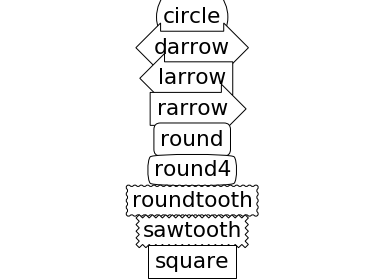

In [30]:
import matplotlib.patches as mpatch

fig1 = plt.gcf()
ax = plt.subplot()

styles = mpatch.BoxStyle.get_styles()
spacing = 1.2

figheight = (spacing * len(styles) + .5)
fig1 = plt.figure(1, (4/1.5, figheight/1.5))
fontsize = 0.3 * 72

for i, stylename in enumerate(sorted(styles.keys())):
    fig1.text(0.5, (spacing * (float(len(styles)) - i) - 0.5)/figheight, stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))
plt.draw()
ax.set_axis_off()
fig.set_tight_layout(ax)
plt.show()

Note that the attribute arguments can be specified within the style name with separating comma (this form can be used as “boxstyle” value of bbox argument when initializing the text instance)
> bb.set_boxstyle("rarrow,pad=0.6")

### Annotating with Arrow¶


The annotate() function in the pyplot module (or annotate method of the Axes class) is used to draw an arrow connecting two points on the plot.

> ax.annotate("Annotation", xy=(x1, y1), xycoords='data', xytext=(x2, y2), textcoords='offset points')

This annotates a point at xy in the given coordinate (xycoords) with the text at xytext given in textcoords. Often, the annotated point is specified in the data coordinate and the annotating text in offset points. See annotate() for available coordinate systems.

An arrow connecting two points (xy & xytext) can be optionally drawn by specifying the arrowprops argument. To draw only an arrow, use empty string as the first argument.

> ax.annotate("", xy=(0.2, 0.2), xycoords='data', xytext=(0.8, 0.8), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

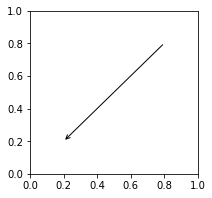

In [31]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.show()

The arrow drawing takes a few steps.

1. a connecting path between two points are created. This is controlled by connectionstyle key value.
2. If patch object is given (patchA & patchB), the path is clipped to avoid the patch.
3. The path is further shrunk by given amount of pixels (shrinkA & shrinkB)
4. The path is transmuted to arrow patch, which is controlled by the arrowstyle key value.

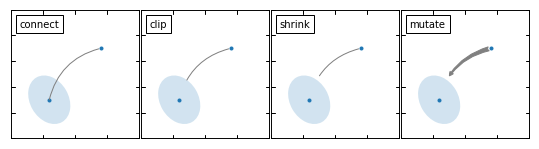

In [33]:
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

The creation of the connecting path between two points is controlled by connectionstyle key and the following styles are available.
```
Name	Attrs
angle	angleA=90,angleB=0,rad=0.0
angle3	angleA=90,angleB=0
arc	angleA=0,angleB=0,armA=None,armB=None,rad=0.0
arc3	rad=0.0
bar	armA=0.0,armB=0.0,fraction=0.3,angle=None

```

Note that “3” in angle3 and arc3 is meant to indicate that the resulting path is a quadratic spline segment (three control points). As will be discussed below, some arrow style options can only be used when the connecting path is a quadratic spline.

The behavior of each connection style is (limitedly) demonstrated in the example below. (Warning : The behavior of the bar style is currently not well defined, it may be changed in the future).

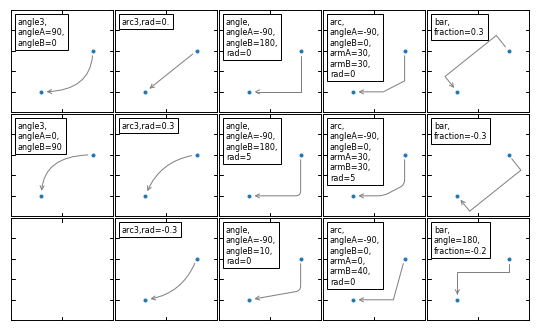

In [34]:
import matplotlib.patches as mpatches

fig = plt.figure(1, figsize=(8,5))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (3, 5), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)


x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7


def demo_con_style(ax, connectionstyle, label=None):

    if label is None:
        label = connectionstyle

    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    add_at(ax, label, loc=2)

column = grid.axes_column[0]

demo_con_style(column[0], "angle3,angleA=90,angleB=0",
               label="angle3,\nangleA=90,\nangleB=0")
demo_con_style(column[1], "angle3,angleA=0,angleB=90",
               label="angle3,\nangleA=0,\nangleB=90")



column = grid.axes_column[1]

demo_con_style(column[0], "arc3,rad=0.")
demo_con_style(column[1], "arc3,rad=0.3")
demo_con_style(column[2], "arc3,rad=-0.3")



column = grid.axes_column[2]

demo_con_style(column[0], "angle,angleA=-90,angleB=180,rad=0",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=0")
demo_con_style(column[1], "angle,angleA=-90,angleB=180,rad=5",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=5")
demo_con_style(column[2], "angle,angleA=-90,angleB=10,rad=5",
               label="angle,\nangleA=-90,\nangleB=10,\nrad=0")


column = grid.axes_column[3]

demo_con_style(column[0], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=0")
demo_con_style(column[1], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=5")
demo_con_style(column[2], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=0,\narmB=40,\nrad=0")


column = grid.axes_column[4]

demo_con_style(column[0], "bar,fraction=0.3",
               label="bar,\nfraction=0.3")
demo_con_style(column[1], "bar,fraction=-0.3",
               label="bar,\nfraction=-0.3")
demo_con_style(column[2], "bar,angle=180,fraction=-0.2",
               label="bar,\nangle=180,\nfraction=-0.2")


#demo_con_style(column[1], "arc3,rad=0.3")
#demo_con_style(column[2], "arc3,rad=-0.3")


grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid.axes_llc.axis["bottom"].toggle(ticklabels=False)
grid.axes_llc.axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

The connecting path (after clipping and shrinking) is then mutated to an arrow patch, according to the given arrowstyle.
```
Name	Attrs
-	None
->	head_length=0.4,head_width=0.2
-[	widthB=1.0,lengthB=0.2,angleB=None
|-|	widthA=1.0,widthB=1.0
-|>	head_length=0.4,head_width=0.2
<-	head_length=0.4,head_width=0.2
<->	head_length=0.4,head_width=0.2
<|-	head_length=0.4,head_width=0.2
<|-|>	head_length=0.4,head_width=0.2
fancy	head_length=0.4,head_width=0.4,tail_width=0.4
simple	head_length=0.5,head_width=0.5,tail_width=0.2
wedge	tail_width=0.3,shrink_factor=0.5
```

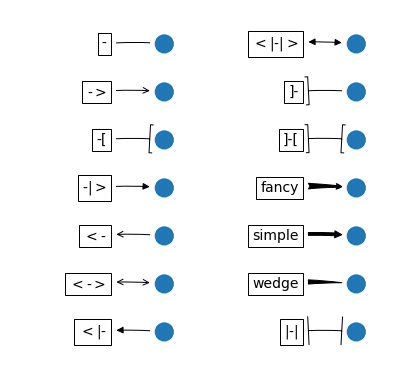

In [35]:
import matplotlib.patches as mpatches

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig1 = plt.figure(1, (4.*ncol/1.5, figheight/1.5))
fontsize = 0.2 * 70


ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4*ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s

for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i//nrow)*4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                #xycoords="figure fraction", textcoords="figure fraction",
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.draw()
plt.show()

Some arrowstyles only work with connection styles that generate a quadratic-spline segment. They are ***fancy, simple, and wedge***. For these arrow styles, you must use the “angle3” or “arc3” connection style.

If the annotation string is given, the patchA is set to the bbox patch of the text by default.

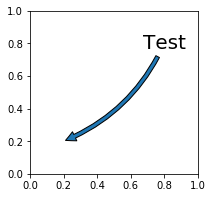

In [36]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ax.annotate("Test",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"), 
            )

plt.show()

As in the text command, a box around the text can be drawn using the bbox argument.

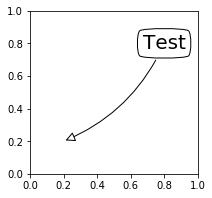

In [37]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"), 
                  )

plt.show()

By default, the starting point is set to the center of the text extent. This can be adjusted with relpos key value. The values are normalized to the extent of the text. For example, (0,0) means lower-left corner and (1,1) means top-right.

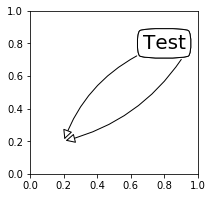

In [38]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"), 
                  )

plt.show()

### Placing Artist at the anchored location of the Axes

There are classes of artists that can be placed at an anchored location in the Axes. A common example is the legend. This type of artist can be created by using the OffsetBox class. A few predefined classes are available in ***mpl_toolkits.axes_grid.anchored_artists***.

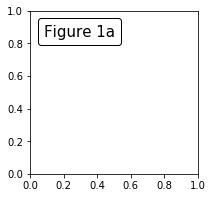

In [41]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

at = AnchoredText("Figure 1a",
                  prop=dict(size=15), frameon=True,
                  loc=2, 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

ax.add_artist(at)
plt.show()

The loc keyword has same meaning as in the legend command.

A simple application is when the size of the artist (or collection of artists) is known in pixel size during the time of creation. For example, If you want to draw a circle with fixed size of 20 pixel x 20 pixel (radius = 10 pixel), you can utilize AnchoredDrawingArea. The instance is created with a size of the drawing area (in pixels), and arbitrary artists can added to the drawing area. Note that the extents of the artists that are added to the drawing area are not related to the placement of the drawing area itself. Only the initial size matters.

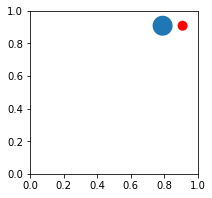

In [42]:
from matplotlib.patches import Circle 
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

p1 = Circle((10, 10), 10)
p2 = Circle((30, 10), 5, fc="r")

ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc=1, pad=0., frameon=False)
ada.drawing_area.add_artist(p1)
ada.drawing_area.add_artist(p2)

ax.add_artist(ada)

plt.show()

The artists that are added to the drawing area should not have a transform set (it will be overridden) and the dimensions of those artists are interpreted ***as a pixel coordinate***, i.e., the radius of the circles in above example are 10 pixels and 5 pixels, respectively.

Sometimes, you want your artists to scale with the data coordinate (or coordinates other than canvas pixels). You can use ***AnchoredAuxTransformBox*** class. This is similar to AnchoredDrawingArea except that the extent of the artist is determined during the drawing time respecting the specified transform.

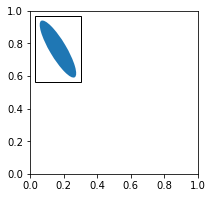

In [43]:
from matplotlib.patches import Ellipse 
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

el = Ellipse((0,0), width=0.1, height=0.4, angle=30) # in data coordinates!

box = AnchoredAuxTransformBox(ax.transData, loc=2)
box.drawing_area.add_artist(el)

ax.add_artist(box)
plt.show()

The ellipse in the above example will have width and height corresponding to 0.1 and 0.4 in data coordinateing and ***will be automatically scaled*** when the view limits of the axes change.

As in the legend, the ***bbox_to_anchor*** argument can be set. Using the ***HPacker*** and ***VPacker***, you can have an arrangement(?) of artist as in the legend (as a matter of fact, this is how the legend is created).

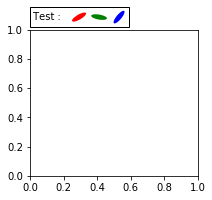

In [44]:
from matplotlib.patches import Ellipse 
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, DrawingArea, HPacker

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

el1 = Ellipse((10, 10), width=16, height=5, angle=30, fc="r")
el2 = Ellipse((30, 10), width=16, height=5, angle=170, fc="g") 
el3 = Ellipse((50, 10), width=16, height=5, angle=230, fc="b") 

box1 = TextArea(" Test : ", textprops=dict(color="k"))

box2 = DrawingArea(60, 20, 0, 0)
box2.add_artist(el1)
box2.add_artist(el2)
box2.add_artist(el3)


box = HPacker(children=[box1, box2],
              align="center",
              pad=0, sep=5)

anchored_box = AnchoredOffsetbox(loc=3,
                                 child=box, pad=0.,
                                 frameon=True,
                                 bbox_to_anchor=(0., 1.02),
                                 bbox_transform=ax.transAxes,
                                 borderpad=0.,
                                 )


ax.add_artist(anchored_box)

fig.subplots_adjust(top=0.8)
plt.show()

### Using Complex Coordinates with Annotations

The Annotation in matplotlib supports several types of coordinates as described in Basic annotation. For an advanced user who wants more control, it supports a few other options.

1. Transform instance. For example,

> ax.annotate("Test", xy=(0.5, 0.5), xycoords=ax.transAxes)

is identical to

> ax.annotate("Test", xy=(0.5, 0.5), xycoords="axes fraction")

With this, you can annotate a point in other axes.  
```
ax1, ax2 = subplot(121), subplot(122)
ax2.annotate("Test", xy=(0.5, 0.5), xycoords=ax1.transData,
             xytext=(0.5, 0.5), textcoords=ax2.transData,
             arrowprops=dict(arrowstyle="->"))

```
2. Artist instance. The xy value (or xytext) is interpreted as a fractional coordinate of the bbox (return value of get_window_extent) of the artist.  

```
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
                  
an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1, # (1,0.5) of the an1's bbox
                  xytext=(30,0), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
```

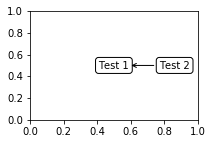

In [48]:
plt.figure(figsize=(3,2))
ax=plt.subplot(111)

an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1,
                  xytext=(30,0), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
plt.show()

Note that it is your responsibility that the extent of the coordinate artist (an1 in above example) is determined before an2 gets drawn. In most cases, it means that an2 needs to be drawn later than an1.  

3. A callable object that returns an instance of either BboxBase or Transform. If a transform is returned, it is the same as 1 and if a bbox is returned, it is the same as 2. The callable object should take a single argument of the renderer instance. For example, the following two commands give identical results  

```
an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1,
                  xytext=(30,0), textcoords="offset points")
an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1.get_window_extent,
                  xytext=(30,0), textcoords="offset points")
```

4. A tuple of two coordinate specifications. The first item is for the x-coordinate and the second is for the y-coordinate. For example,
> annotate("Test", xy=(0.5, 1), xycoords=("data", "axes fraction"))

0.5 is in data coordinates, and 1 is in normalized axes coordinates. You may use an artist or transform as with a tuple. For example,

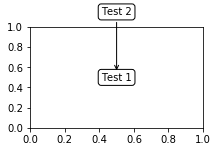

In [50]:
plt.figure(figsize=(3,2))
ax=plt.axes([0.1, 0.1, 0.8, 0.7])
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2", xy=(0.5, 1.), xycoords=an1,
                  xytext=(0.5,1.1), textcoords=(an1, "axes fraction"),
                  va="bottom", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
plt.show()

5. Sometimes, you want your annotation with some “offset points”, not from the annotated point but from some other point. OffsetFrom is a helper class for such cases.

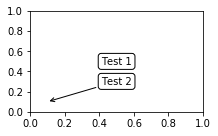

In [52]:
plt.figure(figsize=(3,2))
ax=plt.axes([0.1, 0.1, 0.8, 0.7])
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

from matplotlib.text import OffsetFrom
offset_from = OffsetFrom(an1, (0.5, 0))
an2 = ax.annotate("Test 2", xy=(0.1, 0.1), xycoords="data",
                  xytext=(0, -10), textcoords=offset_from,
                  # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
plt.show()

### Using ConnectorPatch

The ConnectorPatch is like an annotation without text. While the annotate function is recommended in most situations, the ConnectorPatch is useful when you want to connect points in different axes.
```
from matplotlib.patches import ConnectionPatch
xy = (0.2, 0.2)
con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2)
ax2.add_artist(con)
```
The above code connects point xy in the data coordinates of ax1 to point xy in the data coordinates of ax2. Here is a simple example.

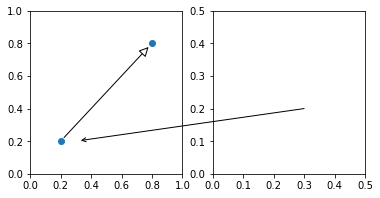

In [53]:
from matplotlib.patches import ConnectionPatch 

fig = plt.figure(1, figsize=(6,3))
ax1 = plt.subplot(121)
xyA=(0.2, 0.2)
xyB=(0.8, 0.8)
coordsA="data"
coordsB="data"
con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                      arrowstyle="-|>", shrinkA=5, shrinkB=5,
                      mutation_scale=20, fc="w")

ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o")
ax1.add_artist(con)

ax2 = plt.subplot(122)
#xyA=(0.7, 0.7)
xy=(0.3, 0.2)
coordsA="data"
coordsB="data"
con = ConnectionPatch(xyA=xy, xyB=xy, coordsA=coordsA, coordsB=coordsB,
                      axesA=ax2, axesB=ax1,
                      arrowstyle="->", shrinkB=5)
ax2.add_artist(con)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax2.set_xlim(0, .5)
ax2.set_ylim(0, .5)
plt.draw()
plt.show()

### Zoom effect between Axes

***mpl_toolkits.axes_grid.inset_locator*** defines some patch classes useful for interconnecting two axes. Understanding the code requires some knowledge of how mpl’s transform works. But, utilizing it will be straight forward.

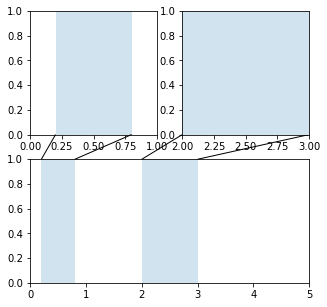

In [54]:
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector, BboxConnectorPatch

def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


import matplotlib.pyplot as plt

plt.figure(1, figsize=(5, 5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(212)
ax2.set_xlim(0, 1)
ax2.set_xlim(0, 5)
zoom_effect01(ax1, ax2, 0.2, 0.8)


ax1 = plt.subplot(222)
ax1.set_xlim(2, 3)
ax2.set_xlim(0, 5)
zoom_effect02(ax1, ax2)

plt.show()

### Define Custom BoxStyle

You can use a custom box style. The value for the boxstyle can be a callable object in the following forms.:
```
def __call__(self, x0, y0, width, height, mutation_size,
             aspect_ratio=1.):
    """
    Given the location and size of the box, return the path of
    the box around it.

      - *x0*, *y0*, *width*, *height* : location and size of the box
      - *mutation_size* : a reference scale for the mutation.
      - *aspect_ratio* : aspect-ratio for the mutation.
    """
    path = ...
    return path
```
Here is a complete example.

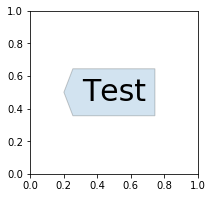

In [55]:
from matplotlib.path import Path

def custom_box_style(x0, y0, width, height, mutation_size, mutation_aspect=1):
    """
    Given the location and size of the box, return the path of
    the box around it.
    
     - *x0*, *y0*, *width*, *height* : location and size of the box
     - *mutation_size* : a reference scale for the mutation.
     - *aspect_ratio* : aspect-ration for the mutation.
    """

    # note that we are ignoring mutation_aspect. This is okay in general.

    # padding
    mypad = 0.3
    pad = mutation_size * mypad

    # width and height with padding added.
    width, height = width + 2.*pad, \
                    height + 2.*pad,

    # boundary of the padded box
    x0, y0 = x0-pad, y0-pad,
    x1, y1 = x0+width, y0 + height

    cp = [(x0, y0),
          (x1, y0), (x1, y1), (x0, y1),
          (x0-pad, (y0+y1)/2.), (x0, y0),
          (x0, y0)]

    com = [Path.MOVETO,
           Path.LINETO, Path.LINETO, Path.LINETO,
           Path.LINETO, Path.LINETO,
           Path.CLOSEPOLY]

    path = Path(cp, com)

    return path


import matplotlib.pyplot as plt

plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center",
        bbox=dict(boxstyle=custom_box_style, alpha=0.2))

However, it is recommended that you derive from the ***matplotlib.patches.BoxStyle._Base*** as demonstrated below.

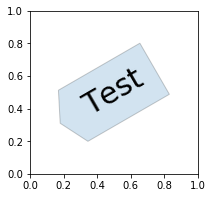

In [56]:
from matplotlib.path import Path
from matplotlib.patches import BoxStyle 

# we may derive from matplotlib.patches.BoxStyle._Base class.
# You need to override transmute method in this case.

class MyStyle(BoxStyle._Base):
    """
    A simple box.
    """

    def __init__(self, pad=0.3):
        """
        The arguments need to be floating numbers and need to have
        default values.
        
         *pad*
            amount of padding
        """

        self.pad = pad
        super(MyStyle, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        Given the location and size of the box, return the path of
        the box around it.

         - *x0*, *y0*, *width*, *height* : location and size of the box
         - *mutation_size* : a reference scale for the mutation.

        Often, the *mutation_size* is the font size of the text.
        You don't need to worry about the rotation as it is
        automatically taken care of.
        """

        # padding
        pad = mutation_size * self.pad

        # width and height with padding added.
        width, height = width + 2.*pad, \
                        height + 2.*pad,

        # boundary of the padded box
        x0, y0 = x0-pad, y0-pad,
        x1, y1 = x0+width, y0 + height

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0-pad, (y0+y1)/2.), (x0, y0),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# register the custom style
BoxStyle._style_list["angled"] = MyStyle

plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center", rotation=30,
        bbox=dict(boxstyle="angled,pad=0.5", alpha=0.2))

del BoxStyle._style_list["angled"]

plt.show()

Similarly, you can define a custom ConnectionStyle and a custom ArrowStyle. See the source code of lib/matplotlib/patches.py and check how each style class is defined.

## Writing mathematical expressions
http://matplotlib.org/users/mathtext.html

You can use a subset TeX markup in any matplotlib text string by placing it inside a pair of dollar signs ($).

Note that you do not need to have TeX installed, since ***matplotlib ships its own TeX expression parser, layout engine and fonts***. The layout engine is a fairly direct adaptation of the layout algorithms in Donald Knuth’s TeX, so the quality is quite good (matplotlib also provides a usetex option for those who do want to call out to TeX to generate their text (see Text rendering With LaTeX).

Any text element can use math text. You should use raw strings (precede the quotes with an 'r'), and surround the math text with dollar signs ($), as in TeX. Regular text and mathtext can be interleaved within the same string. Mathtext can use DejaVu Sans (default), DejaVu Serif, the Computer Modern fonts (from (La)TeX), STIX fonts (with are designed to blend well with Times), or a Unicode font that you provide. The mathtext font can be selected with the customization variable ***mathtext.fontset*** (see Customizing matplotlib)

Note:  
On “narrow” builds of Python, if you use the STIX fonts you should also set ps.fonttype and pdf.fonttype to 3 (the default), not 42. Otherwise some characters will not be visible.  

Here is a simple example:
Whereas this:
```
alpha > beta
```
produces “alpha > beta”

Whereas this: 
```
$\alpha > \beta$
```
produces $\alpha > \beta$


Note:  
Mathtext should be placed between a pair of dollar signs (\$). To make it easy to display monetary values, e.g., “$100.00”, if a single dollar sign is present in the entire string, it will be displayed verbatim as a dollar sign. This is a small change from regular TeX, where the dollar sign in non-math text would have to be escaped (‘\$’).  

Note:  
While the syntax inside the pair of dollar signs ($) aims to be ***TeX-like***, the text outside does not. In particular, characters such as:

 \$ % & ~ _ ^ \ { } \( \) \[ \] 
 
have special meaning outside of math mode in TeX. Therefore, these characters will behave differently depending on the rcParam ***text.usetex*** flag. See the usetex tutorial for more information.  

## Subscripts and superscripts

To make subscripts and superscripts, use the '_' and '^' symbols:
```
$\alpha_i > \beta_i$
```
$\alpha_i > \beta_i$

Some symbols automatically put their sub/superscripts under and over the operator. For example, to write the sum of  from  to , you could do:
```
$\sum_{i=0}^\infty x_i$
```
$\sum_{i=0}^\infty x_i$

## Fractions, binomials and stacked numbers

Fractions, binomials and stacked numbers can be created with the \frac{}{}, \binom{}{} and \stackrel{}{} commands, respectively:
```
$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$
```
$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$

Fractions can be arbitrarily nested:
```
$\frac{5 - \frac{1}{x}}{4}$
```
produces
$\frac{5 - \frac{1}{x}}{4}$

Note that special care needs to be taken to place parentheses and brackets around fractions. Doing things the obvious way produces brackets that are too small:
```
$(\frac{5 - \frac{1}{x}}{4})$
```
r'$(\frac{5 - \frac{1}{x}}{4})$

The solution is to precede the bracket with ***\left*** and ***\right*** to inform the parser that those brackets encompass the entire object:
```
$\left(\frac{5 - \frac{1}{x}}{4}\right)$
```
$\left(\frac{5 - \frac{1}{x}}{4}\right)$

## Radicals

Radicals
Radicals can be produced with the \sqrt[]{} command. For example:
```
$\sqrt{2}$
```
$\sqrt{2}$

Any base can (optionally) be provided inside square brackets. Note that the base must be a simple expression, and can not contain layout commands such as fractions or sub/superscripts:
```
$\sqrt[3]{x}$
```
$\sqrt[3]{x}$

## Fonts

The default font is ***italics*** for mathematical symbols.

Note:  
This default can be changed using the ***mathtext.default*** rcParam. This is useful, for example, to use the same font as regular non-math text for math text, by setting it to regular.

To change fonts, e.g., to write “sin” in a Roman font, enclose the text in a font command:
```
$s(t) = \mathcal{A}\mathrm{sin}(2 \omega t)$
```
$s(t) = \mathcal{A}\mathrm{sin}(2 \omega t)$  

More conveniently, many commonly used function names that are typeset in a Roman font have shortcuts. So the expression above could be written as follows:
```
$s(t) = \mathcal{A}\sin(2 \omega t)$
```
$s(t) = \mathcal{A}\sin(2 \omega t)$  

Here “s” and “t” are variable in italics font (default), “sin” is in Roman font, and the amplitude “A” is in calligraphy font. Note in the example above the caligraphy A is squished into the sin. You can use a spacing command to add a little whitespace between them:
```
$s(t) = \mathcal{A}\ \sin(2 \omega t)$
```
$s(t) = \mathcal{A}\ \sin(2 \omega t)$  


The choices available with all fonts are:  
Command	Result:  
\mathrm{Roman}  $\mathrm{Roman}$    
\mathit{Italic}	$\mathit{Italic}$  
\mathtt{Typewriter}	$\mathtt{Typewriter}$    
\mathcal{CALLIGRAPHY}  $\mathcal{CALLIGRAPHY}$  	


When using the STIX fonts, you also have the choice of:  
Command	Result  
\mathbb{blackboard}	  $\mathbb{blackboard}$  	
\mathrm{\mathbb{blackboard}}  $\mathrm{\mathbb{blackboard}}$  	
\mathfrak{Fraktur}	$\mathfrak{Fraktur}$  	
\mathsf{sansserif}	$\mathsf{sansserif}$  	
\mathrm{\mathsf{sansserif}}	 $\mathrm{\mathsf{sansserif}}$  	
\mathcircled{circled}  $\mathcircled{circled}$   

There are also three global “font sets” to choose from, which are selected using the ***mathtext.fontset*** parameter in matplotlibrc.  

cm: Computer Modern (TeX)   
stix: STIX (designed to blend well with Times)   
stixsans: STIX sans-serif  

Additionally, you can use ***\mathdefault{...}*** or its alias ***\mathregular{...}*** to use the font used for regular text outside of mathtext. There are a number of limitations to this approach, most notably that far fewer symbols will be available, but it can be useful to make math expressions blend well with other text in the plot.

### Custom fonts

mathtext also provides a way to use custom fonts for math. This method is fairly tricky to use, and should be considered an experimental feature for patient users only. By setting the rcParam mathtext.fontset to custom, you can then set the following parameters, which control which font file to use for a particular set of math characters.

```
Parameter	Corresponds to
mathtext.it	\mathit{} or default italic
mathtext.rm	\mathrm{} Roman (upright)
mathtext.tt	\mathtt{} Typewriter (monospace)
mathtext.bf	\mathbf{} bold italic
mathtext.cal	\mathcal{} calligraphic
mathtext.sf	\mathsf{} sans-serif
```
Each parameter should be set to a fontconfig font descriptor (as defined in the yet-to-be-written font chapter).

The fonts used should have a ***Unicode*** mapping in order to find any non-Latin characters, such as Greek. If you want to use a math symbol that is not contained in your custom fonts, you can set the rcParam ***mathtext.fallback_to_cm*** to True which will cause the mathtext system to use characters from the default Computer Modern fonts whenever a particular character can not be found in the custom font.

Note that the math glyphs specified in Unicode have evolved over time, and many fonts may not have glyphs in the correct place for mathtext.

## Accents

## Symbols

## Example

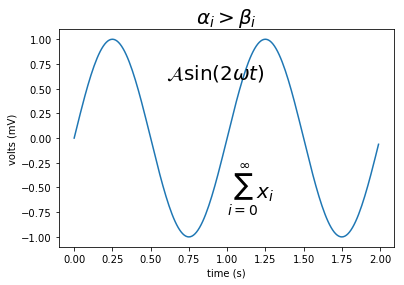

In [57]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)

plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)

plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

## Text rendering With LaTeX
http://matplotlib.org/users/usetex.html

Matplotlib has the option to use LaTeX to manage all text layout. This option is available with the following backends:

- Agg
- PS
- PDF 

The LaTeX option is activated by setting ***text.usetex*** : True in your rc settings. Text handling with matplotlib’s LaTeX support is slower than matplotlib’s very capable mathtext, but is more flexible, since different LaTeX packages (font packages, math packages, etc.) can be used. The results can be striking, especially when you take care to use the same fonts in your figures as in the main document.

Matplotlib’s LaTeX support ***requires a working LaTeX installation***, dvipng (which may be included with your LaTeX installation), and Ghostscript (GPL Ghostscript 8.60 or later is recommended). The executables for these external dependencies must all be located on your PATH.

There are a couple of options to mention, which can be changed using rc settings. Here is an example matplotlibrc file:
```
font.family        : serif
font.serif         : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
font.sans-serif    : Helvetica, Avant Garde, Computer Modern Sans serif
font.cursive       : Zapf Chancery
font.monospace     : Courier, Computer Modern Typewriter

text.usetex        : true
```
The first valid font in each family is the one that will be loaded. If the fonts are not specified, the Computer Modern fonts are used by default. All of the other fonts are Adobe fonts. Times and Palatino each have their own accompanying math fonts, while the other Adobe serif fonts make use of the Computer Modern math fonts. See the PSNFSS documentation for more details.

To use LaTeX and select Helvetica as the default font, without editing matplotlibrc use: 